## 基于MindSpore框架的Adam优化器案例实现

### 1 Adam优化器简介
最优化问题是计算数学中最为重要的研究方向之一。而在深度学习领域，优化算法的选择也是一个模型的重中之重。即使在数据集和模型架构完全相同的情况下，采用不同的优化算法，也很可能导致截然不同的训练效果。梯度下降是目前神经网络中使用最为广泛的优化算法之一。为了弥补朴素梯度下降的种种缺陷，研究者们发明了一系列变种算法，从最初的 SGD (随机梯度下降) 逐步演进到 NAdam, 本文将着重介绍Adam优化器。   

2014年12月，Kingma和Lei Ba两位学者在《ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION》一文中提出了Adam优化器。Adam是一种有效的随机优化方法，只需要一阶梯度，内存需求很少。该方法根据梯度的一阶矩（First Moment Estimation，即梯度的均值）和二阶矩（Second Moment Estimation，即梯度的未中心化的方差）的估计计算不同参数的个体自适应学习率； Adam 这个名字来源于自适应矩估计。Adam优化方法方法旨在结合两种流行的方法的优点：AdaGrad (Duchi et al., 2011)，适用于稀疏梯度，和 RMSProp (Tieleman & Hinton, 2012)，适用于在线和非固定设置。

#### 1.1 Adam算法介绍

<center>
    <img src="./image/alg.png" alt="image-20220819101847606" width=50% />
    <br>
    <div style="color:orange;
    display: inline-block;
    color: #999;
    padding: 2px;">图1 adam算法</div>
</center>
a） 算法输入︰学习率α；分别作为梯度的一阶和二阶指数移动加权衰减率$ β_{1}$（默认为0.9）、$ β_{2}$（默认为0.999）；模型参数θ的损失函数f（θ），ε表示数值计算稳定性参数，一般取一个很小的浮点数，为了防止分母为0（默认为$ 10^{-8} $）。

b） 初始化：梯度的一阶指数移动加权平均$ m_{t} $（初始化为0）和二阶指数移动加权平均$ v_{t} $（初始化为0），$ m_{t} $是对到目前为止$ g_{t}$的一阶原点距E[$ g_{t}$]的有偏估计，$ v_{t} $是对到目前为$ g_{t}$的二阶原点距估计E[$ g_{t}^2 $]的有偏估计。

c） 迭代：不断进行梯度下降，直到参数$ θ_{t}$收敛。

其中梯度下降过程： 1）计算第t轮迭代的梯度$ g_{t}$，


$$g_{t} =\nabla_{θ}f_{t}(θ_{t-1}) $$ 
更新$ m_{t}$、$ v_{t}$:
$$m_{t} = β_{1}*m_{t-1}+(1-β_{1})*g_{t} $$ 
$$v_{t} = β_{2}*v_{t-1}+(1-β_{1})*g_{t}^2 $$ 



2）在迭代初期，$ m_{t}$对E[$ g_{t}$]的估计以及$ v_{t} $对E[$ g_{t}^2$]的估计都是有偏的，需要进行偏差修正，修正系数分别是$\cfrac{1}{1-β_{1}^t}$和$\cfrac{1}{1-β_{2}^t}$，随着迭代的进行，估计逐渐变为无偏估计，修正强度逐渐降低为1。

$$\widehat{m}_{t} =  \cfrac{m_{t}}{1-β_{1}^t}$$ 
$$\widehat{v}_{t} =  \cfrac{v_{t}}{1-β_{2}^t}$$ 

3）更新模型参数$ θ_{t} $: 

$$ θ_{t} =  θ_{t-1}-α\cfrac{m_{t}}{\sqrt[]{v_{t}+ \epsilon}}$$ 

分子表示$ g_{t} $在过去一段时间内各分量的平均值，即梯度更新的大致走向，分母表示$ g_{t} $在过去一段时间内各分量的平均大小。第一步是确定一个合适的下降方向（即分子项），第二步，对这个选定的方向上的各个子方向做一下微调（分母项），这样，推进较快的子方向会慢下来，推进较慢的子方向会加快速度，结合了Momentum和RMSprop两种算法的优点，动态调整了各个子方向的学习率，。


#### 1.2 adam优化器优点
a）惯性保持：Adam算法记录了梯度的一阶矩，即过往所有梯度与当前梯度的平均，使得每一次更新时，上一次更新的梯度与当前更新的梯度不会相差太大，即梯度平滑、稳定的过渡，可以适应不稳定的目标函数。

b）环境感知：Adam记录了梯度的二阶矩，即过往梯度平方与当前梯度平方的平均，这体现了环境感知能力，为不同参数产生自适应的学习速率。

c）超参数，即α，$ β_{1}$，$ β_{2}$，ε具有很好的解释性，且通常无需调整或仅需很少的微调。


#### 1.3 adam优化器与SGDNesterov,Adagrad比较
通过研究了不同的流行机器学习模型，包括逻辑回归、多层完全连接神经网络和深度卷积神经网络。使用大型模型和数据集， Adam可以有效地解决实际的深度学习问题。
可以使用MNIST数据集调用不同优化器评估逻辑回归模型。可以使用128的小批量大小将Adam与具有Nesterov动量和Adagrad的加速SGD进行了比较。根据图1，我们发现Adam产生了与具有动量的SGD相似的收敛性，并且两者都比Adagra收敛得更快。
<center>
    <img src="./image/MNIST Logistic Regression.png" alt="image-20220819101847606" width=30% />
    <br>
    <div style="color:orange;
    display: inline-block;
    color: #999;
    padding: 2px;">图2 优化器比较</div>
</center>
如（Duchi等人，2011）所述，AdagradSGD可以有效地处理稀疏特征和梯度，这是其主要的理论结果之一，而SGD在学习稀有特征方面很低。

### 2 基于Adam的Lenet手写识别案例实现

#### **2.1 环境准备与数据读取**

本案例基于MindSpore-CPU版本实现，在CPU上完成模型训练。

MindSpore Vision是一个开源的基于MindSpore框架的计算机视觉研究工具箱，工具所涉及的任务主要包括分类，采用如下命令安装mindvision套件






In [1]:
!pip install mindvision
!pip uninstall opencv-python-headless-4.6.0.66
!pip install "opencv-python-headless<4.3"

Looking in indexes: http://192.168.0.122:8888/repository/pypi/simple
Looking in indexes: http://192.168.0.122:8888/repository/pypi/simple


案例实现所使用的数据即MNIST数据集，可以从http://yann.lecun.com/exdb/mnist/ 中下载，下载好的数据集包括4个文件，分别对应测试集图像、测试集标签、训练集图像、训练集样本，文件路径结构如下：

```
./mnist/
├── test
│   ├── t10k-images-idx3-ubyte
│   └── t10k-labels-idx1-ubyte
└── train
    ├── train-images-idx3-ubyte
    └── train-labels-idx1-ubyte
```
MNIST数据集是由10类28∗28的灰度图片组成。其中测试集test包括55000张训练图像，5000张验证图像；训练集train包括10000张训练图像。

##### **数据集准备与加载**

In [2]:
import os
from mindvision.dataset import DownLoad

#数据集下载路径
dataset_url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/" \
      "notebook/datasets/MNIST_Data.zip"
save_dir = "./data"

#数据集下载
dl = DownLoad()
if not(os.path.exists(save_dir+"/mnist-bin")):
    dl.download_and_extract_archive(dataset_url, save_dir)

In [3]:
from mindvision.dataset import Mnist
from mindspore.dataset import MnistDataset

#数据集下载
dataset_train = MnistDataset(save_dir+"/MNIST_Data/train",shuffle=True) # 训练集
dataset_eval = MnistDataset(save_dir+"/MNIST_Data/test",shuffle=True)   # 测试集

In [7]:
import mindspore as ms
from mindspore.dataset import vision, transforms

#数据集处理: datapipe()
def datapipe(dataset, batch_size,usage):
    image_transforms=[
        vision.Resize((32, 32)),
        vision.Rescale(1.0 / 255.0,0),
        vision.HWC2CHW()
    ]

    label_transform = transforms.TypeCast(ms.int32)
    dataset = dataset.map(image_transforms, 'image')
    dataset = dataset.map(label_transform, 'label')
    dataset = dataset.batch(batch_size)

    return dataset

In [8]:
#处理数据集
BATCH_SIZE = 32

dataset_train = datapipe(dataset_train,BATCH_SIZE,"train")
dataset_eval = datapipe(dataset_eval,BATCH_SIZE,"test")

#### **2.2 模型构建**

Lenet除去输入层共有7层，其中有2个卷积层，2个子采样（pooling）层，3个全连接层，网络模型结构如下图所示。
<center>
    <img src="./image/lenet.png" alt="image-20220819101847606" style="zoom:67%;" />
    <br>
    <div style="color:orange;
    display: inline-block;
    color: #999;
    padding: 2px;"</div>
</center>
根据mindvision提供的lenet网络模型接口，定义network如下：

In [10]:
from mindvision.classification.models import lenet

network = lenet(num_classes=10, pretrained=False)

#### **2.3 定义损失函数和优化器**

SoftmaxCrossEntropyWithLogits()为mindspore中分类任务的交叉熵损失函数,优化器选择使用nn.adam()，其中训练参数为network.trainable_params()，学习率（lr）取0.001。

In [11]:
import mindspore.nn as nn

# 定义损失函数
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

# 定义优化器函数
net_opt = nn.Adam(network.trainable_params(), learning_rate=0.001)


#### **2.4 模型训练和保存**

在此处，使用ModelCheckpoint接口用于保存网络模型和参数，以便进行后续的微调操作。

In [12]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig

# 设置模型保存参数
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)

# 应用模型保存参数
ckpoint = ModelCheckpoint(prefix="lenet", directory="./lenet", config=config_ck)


使用MindSpore提供的model.train接口进行网络的训练，使用mindvision中LossMonitor监控训练过程中loss值的变化。

In [13]:
from mindvision.engine.callback import LossMonitor
from mindspore.train import Model
import mindspore as ms

# 选择执行模式为图模式；指定训练使用的平台为"Ascend"
# ms.set_context(mode=ms.GRAPH_MODE, device_target="Ascend")

# 初始化模型参数
model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={'accuracy'})

# 训练网络模型
model.train(10, dataset_train, callbacks=[ckpoint, LossMonitor(0.001, 1875)])

Epoch:[  0/ 10], step:[ 1875/ 1875], loss:[0.205/0.205], time:18937.808 ms, lr:0.00100
Epoch time: 26372.041 ms, per step time: 14.065 ms, avg loss: 0.205
Epoch:[  1/ 10], step:[ 1875/ 1875], loss:[0.031/0.031], time:2830.553 ms, lr:0.00100
Epoch time: 2833.127 ms, per step time: 1.511 ms, avg loss: 0.031
Epoch:[  2/ 10], step:[ 1875/ 1875], loss:[0.023/0.023], time:2857.090 ms, lr:0.00100
Epoch time: 2859.557 ms, per step time: 1.525 ms, avg loss: 0.023
Epoch:[  3/ 10], step:[ 1875/ 1875], loss:[0.013/0.013], time:3158.292 ms, lr:0.00100
Epoch time: 3162.169 ms, per step time: 1.686 ms, avg loss: 0.013
Epoch:[  4/ 10], step:[ 1875/ 1875], loss:[0.010/0.010], time:2930.627 ms, lr:0.00100
Epoch time: 2932.942 ms, per step time: 1.564 ms, avg loss: 0.010
Epoch:[  5/ 10], step:[ 1875/ 1875], loss:[0.002/0.002], time:2695.876 ms, lr:0.00100
Epoch time: 2699.173 ms, per step time: 1.440 ms, avg loss: 0.002
Epoch:[  6/ 10], step:[ 1875/ 1875], loss:[0.048/0.048], time:2793.121 ms, lr:0.00100

#### **2.5 模型评估**

将测试集置于训练好的模型上进行评估，输出的acc为评估的准确率

In [14]:
acc = model.eval(dataset_eval)

print("{}".format(acc))

{'accuracy': 0.9902156549520766}


#### **2.6 模型验证与预测**

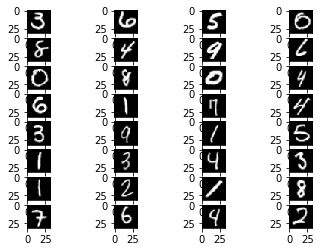

Predicted: "[3 6 5 0 8 4 9 6 0 8 0 9 6 1 9 4 3 9 1 5 1 3 4 3 1 2 1 8 7 6 4 2]"
Actual:    "[3 6 5 0 8 4 9 6 0 8 0 4 6 1 7 4 3 9 1 5 1 3 4 3 1 2 1 8 7 6 4 2]"


In [25]:
import numpy as np
from mindspore import Tensor
import matplotlib.pyplot as plt
import mindspore as ms

# 实例化model类
model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={'accuracy'})
# 加载已经保存的用于测试的模型
param_dict = ms.load_checkpoint("./lenet/lenet-1_1875.ckpt")


# 加载参数到网络中
ms.load_param_into_net(network, param_dict)

# dataset_train = MnistDataset(save_dir+"/MNIST_Data/train",shuffle=True)
dataset_infer = MnistDataset(save_dir+"/MNIST_Data/test",shuffle=True)   # 测试集
dataset_infer = datapipe(dataset_infer,BATCH_SIZE,"test")

ds_test = dataset_infer.create_dict_iterator()
data = next(ds_test)
images = data["image"].asnumpy()
labels = data["label"].asnumpy()

plt.figure()
for i in range(1, 33):
    plt.subplot(8, 4, i)
    plt.imshow(images[i-1][0], interpolation="None", cmap="gray")
plt.show()

# 使用函数model.predict预测image对应分类
output = model.predict(Tensor(data['image']))
predicted = np.argmax(output.asnumpy(), axis=1)

# 输出预测分类与实际分类
print(f'Predicted: "{predicted}"')
print(f'Actual:    "{labels}"')

### 3、总结 ###
本案例首先对ADAM优化器做了简单的介绍，讲解了ADAM优化器的基本算法，指出ADAM的优点，并和   SGDNesterov,Adagrad做了比较。然后，我们基于mindspore框架实现了应用ADAM优化器的一个案例——lenet手写识别，通过此案例可以初步掌握MindSpore中ADAM优化器的使用以及实现案例的基本流程，为MindSpore的使用提供支持。
